# Project: Multi-Objective Optimization

In [136]:
import numpy as np

## Part 1. Continuous Multi-Objective Optimization
In this part, we have implemented the two-objective ZDT3 problem [1] and the vehicle crashworthiness design problem [2], and provided examples on how to use them. <u>**Your task is to implement <span style="color:blue;">NSGA-II</span> and use it to solve these two problems**</u>.

[1] Zitzler, E., Deb, K., & Thiele, L. (2000). Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary computation, 8(2), 173-195.

[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

### Introduction to a Two-Objective Test Problem: ZDT3
The ZDT test suite [1] is a well-known set of benchmark problems in multi-objective optimization. It was introduced by Zitzler, Deb, and Thiele in 2000 to evaluate the performance of multi-objective optimization algorithms. ZDT3 is one of the test problems in the ZDT test suite.

- Number of objectives: 2
- Number of decision variables: 30

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=x_1 \\
f_2(\mathbf{x})=g(\mathbf{x}) h(\mathbf{x})
\end{array}\:,\right. \\
&\mathrm{where} \enspace g(\mathbf{x})=1+\frac{9}{n-1} \sum_{i=2}^n x_i, \\
& \qquad \enspace h(\mathbf{x})=1-\sqrt{f_1(\mathbf{x}) / g(\mathbf{x})}-\left(f_1(\mathbf{x}) / g(\mathbf{x})\right) \sin \left(10 \pi f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$

[1] E. Zitzler, K. Deb, and L. Thiele, Comparison of multiobjective evolutionary algorithms: Empirical results, Evolutionary computation, 2000, 8(2): 173-195.

In [137]:
class ZDT3():

    def __init__(self):
        self.name = 'ZDT3'
        self.n_obj = 2  # number of objectives
        self.n_var = 30  # number of decision variables

        self.lower = np.zeros(self.n_var)  # lower bound of decision variables
        self.upper = np.ones(self.n_var)  # upper bound of decision variables

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj)) # for each chromosom, we have 2 objective function evals.
        f[:, 0] = x[:, 0]
        g = 1.0 + 9.0 * np.sum(x[:, 1:], axis=1) / (self.n_var - 1)
        h = 1 - np.power(
            f[:, 0] * 1.0 / g,
            0.5) - (f[:, 0] * 1.0 / g) * np.sin(10 * np.pi * f[:, 0])
        f[:, 1] = g * h

        return f

In [138]:
# Create an instance of ZDT3
prob = ZDT3()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = ZDT3
Number of objectives = 2
Number of variables = 30
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [139]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)

f = prob.evaluate(x)
print(f"f(x) = {f}")


f(x) = [[0.53426302 4.99020965]]


In [ ]:
# Initialize a population with 2 solutions and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[0.91346589 0.14061474 0.18872378 0.21996487 0.77276342 0.01950967
  0.36132994 0.65448863 0.30006845 0.11457266 0.59446427 0.17462823
  0.73837495 0.86397271 0.33874492 0.80450926 0.56355339 0.47559511
  0.87784729 0.11581894 0.35211601 0.03650233 0.45037665 0.77852382
  0.5252241  0.45705709 0.26021825 0.69978487 0.50042301 0.4683134 ]
 [0.87096525 0.14013779 0.5304623  0.97396906 0.79426707 0.37667295
  0.14889665 0.86278965 0.66045159 0.14159007 0.06412278 0.1410905
  0.77624595 0.11588656 0.55986871 0.3738487  0.75060789 0.06172931
  0.10986196 0.56015782 0.26511632 0.1799136  0.26154461 0.43045521
  0.3697654  0.41210305 0.25927737 0.27133816 0.75008044 0.64050485]]
f(x) = [[0.91346589 3.22792559]
 [0.87096525 2.00271792]]


### TODO: Implement NSGA-II and Solve ZDT3 (30 marks)

Your task is **to implement NSGA-II, use it to solve ZDT3, obtain the final population, and visualize the final population.**

To help you get started, we have provided skeleton code for NSGA-II, which serves as a starting point for you to add your own implementation. Please note that you **should not modify the framework** we have given you. More precisely, edit the "TODO" parts and do not introduce other functions.  Additionally, we have also provided you with code to create instances of the NSGA2() and ZDT3() classes.

An example of the expected output is shown in the following figure, which displays the true Pareto front of ZDT3 (represented by red lines) and the final population obtained by NSGA-II (represented by grey circles). Your final solutions should be similar to these grey circles.

<img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_ZDT3.png?raw=true" alt="ZDT3" width="40%">

It is crucial to ensure that your code runs successfully, as failing to do so may result in a zero mark for this task. If you face difficulties in implementing NSGA-II in this part, you can refer to available source codes online, such as [PlatEMO](https://github.com/BIMK/PlatEMO/blob/master/PlatEMO/Algorithms/Multi-objective%20optimization/NSGA-II/NSGAII.m) and [pymoo](https://github.com/anyoptimization/pymoo/blob/main/pymoo/algorithms/moo/nsga2.py), or seek assistance from ChatGPT.

In [140]:
class NSGA2():
    def __init__(self, lower, upper, pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=20, eta_m=20):
        self.pop_size = pop_size
        #-----------BEGIN-----------#
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.eta_c = eta_c
        self.eta_m = eta_m
        self.lower = lower
        self.upper = upper
        self.mating_pool = None
        # TODO: Include other parameters you may use to create an
        #       instance of NSGA2(), such as crossover probability
        #       and mutation probability
        #-----------END-----------#

    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
            self.pop_size, prob.n_var)
        return x

    def fitness_assignment(self, population_fx):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance
        # to assign non-domination rank and local crowding distance to each
        # solution in the parent population, which will be used later in
        # tournament
        # Initailize
        pop_size = len(population_fx)
        ranks = np.zeros(pop_size)
        crowding_distances = np.zeros(pop_size)

        domination_counts = np.zeros(pop_size)
        dominated_solutions = [set() for _ in range(pop_size)]
        current_front = []
        # Count the domination
        for i in range(pop_size):
            for j in range(pop_size):
                if self.dominates(population_fx[i], population_fx[j]):
                    dominated_solutions[i].add(j)
                elif self.dominates(population_fx[j], population_fx[i]):
                    domination_counts[i] += 1

            if domination_counts[i] == 0:
                ranks[i] = 0
                current_front.append(i)

        front_rank = 0
        while current_front:
            next_front = []
            for i in current_front:
                for j in dominated_solutions[i]:
                    domination_counts[j] -= 1
                    if domination_counts[j] == 0:
                        ranks[j] = front_rank + 1
                        next_front.append(j)
            front_rank += 1
            current_front = next_front

        # crowding distance
        for rank in range(front_rank):
            front = [index for index in range(pop_size) if ranks[index] == rank]
            front_distances = np.zeros(len(front))
            normalized_fx = (population_fx[front] - population_fx.min(axis=0)) / \
                            (population_fx.max(axis=0) - population_fx.min(axis=0))

            for m in range(normalized_fx.shape[1]):
                sorted_indices = np.argsort(normalized_fx[:, m])
                front_distances[sorted_indices[0]] = front_distances[sorted_indices[-1]] = np.inf
                for i in range(1, len(front) - 1):
                    front_distances[sorted_indices[i]] += normalized_fx[sorted_indices[i + 1], m] - \
                                                           normalized_fx[sorted_indices[i - 1], m]

            crowding_distances[front] = front_distances

        return ranks, crowding_distances

    @staticmethod
    def dominates(individual_a, individual_b):
       return (np.all(np.array(individual_a) <= np.array(individual_b)) and
            np.any(np.array(individual_a) < np.array(individual_b)))
        #-----------END-----------#

    def tournament_selection(self, population,ranks, distances, tournament_size=2):
        #-----------BEGIN-----------#
        # TODO: Implement tournament selection on parent population to
        #  mating pool
        if isinstance(tournament_size, np.ndarray):
          tournament_size = tournament_size[0]
        if isinstance(self.pop_size, np.ndarray):
          self.pop_size = self.pop_size[0]
        if tournament_size > self.pop_size:
            tournament_size = self.pop_size

        self.mating_pool = np.zeros_like(population)

        for i in range(self.pop_size):
            competitors_idx = np.random.choice(self.pop_size, tournament_size, replace=False)
            competitors_ranks = ranks[competitors_idx]
            competitors_distances = distances[competitors_idx]
            sorted_idx_by_rank = np.argsort(competitors_ranks)
            best_idx = sorted_idx_by_rank[0]
            if competitors_ranks[sorted_idx_by_rank[0]] == competitors_ranks[sorted_idx_by_rank[1]]:
                best_idx = sorted_idx_by_rank[np.argmax(competitors_distances[sorted_idx_by_rank])]

            winner_idx = competitors_idx[best_idx]
            self.mating_pool[i, :] = population[winner_idx, :]

        return self.mating_pool
        #-----------END-----------#
    def crossover(self, pc):
        #-----------BEGIN-----------#
        # TODO: Implement simulated binary crossover (SBX) to generate
        #       offspring of size `pop_size`
        offspring = np.empty((self.pop_size, self.mating_pool.shape[1]))

        for i in range(0, self.pop_size, 2):
            parent1 = self.mating_pool[i, :]
            parent2 = self.mating_pool[i + 1, :] if i + 1 < self.pop_size else self.mating_pool[0, :]
            child1, child2 = parent1.copy(), parent2.copy()

            if np.random.rand() < pc:
                for j in range(self.mating_pool.shape[1]):
                    if np.random.rand() < 0.5:
                        if abs(parent1[j] - parent2[j]) > 1e-14:
                            y1 = min(parent1[j], parent2[j])
                            y2 = max(parent1[j], parent2[j])
                            beta = 1.0 + (2.0 * (y1 - self.lower[j]) / (y2 - y1))
                            alpha = 2.0 - np.power(beta, -(self.eta_c + 1))
                            if np.random.rand() < 1.0 / alpha:
                                beta_q = np.power(np.random.rand() * alpha, 1.0 / (self.eta_c + 1))
                            else:
                                beta_q = np.power(1.0 / (2.0 - np.random.rand() * alpha), 1.0 / (self.eta_c + 1))

                            c1 = 0.5 * ((y1 + y2) - beta_q * (y2 - y1))
                            c2 = 0.5 * ((y1 + y2) + beta_q * (y2 - y1))

                            c1 = min(max(c1, self.lower[j]), self.upper[j])
                            c2 = min(max(c2, self.lower[j]), self.upper[j])

                            child1[j] = c1
                            child2[j] = c2

                offspring[i, :] = child1
                offspring[i + 1, :] = child2 if i + 1 < self.pop_size else child1
            else:
                offspring[i, :] = parent1
                offspring[i + 1, :] = parent2 if i + 1 < self.pop_size else parent1

        return offspring
        #-----------END-----------#

    def mutation(self, pm, offspring):
        #-----------BEGIN-----------#
        # TODO: Implement polynomial mutation (PM)

        # The number of decision variables for each individual in the population
        num_vars = offspring.shape[1]

        for i in range(offspring.shape[0]):
            for j in range(num_vars):
                if np.random.rand() < pm:
                    y = offspring[i, j]
                    delta_l = (y - self.lower[j]) / (self.upper[j] - self.lower[j])
                    delta_u = (self.upper[j] - y) / (self.upper[j] - self.lower[j])
                    rand = np.random.rand()
                    mut_pow = 1.0 / (self.eta_m + 1.0)
                    if rand < 0.5:
                        xy = 1.0 - delta_l
                        val = 2.0 * rand + (1.0 - 2.0 * rand) * (xy ** (self.eta_m + 1))
                        delta_q = (val ** mut_pow) - 1.0
                    else:
                        xy = 1.0 - delta_u
                        val = 2.0 * (1.0 - rand) + 2.0 * (rand - 0.5) * (xy ** (self.eta_m + 1))
                        delta_q = 1.0 - (val ** mut_pow)

                    y = y + delta_q * (self.upper[j] - self.lower[j])
                    offspring[i, j] = min(max(y, self.lower[j]), self.upper[j])

        return offspring
        #-----------END-----------#


    def environmental_selection(self, combined_population, combined_fitness):
        #-----------BEGIN-----------#
        # TODO: Implement non-dominated sorting and crowding distance on
        # the combined population of parent population and offspring population
        # to select `pop_size` solutions for next population from combined population
        # of 2 * `pop_size` solutions
        # Get non-dominated sorting and crowding distances using similar logic to fitness_assignment
        ranks, crowding_distances = self.fitness_assignment(combined_fitness)

        new_population_indices = []
        for rank in np.unique(ranks):
            front_indices = np.where(ranks == rank)[0]
            if len(new_population_indices) + len(front_indices) > self.pop_size:
                break
            new_population_indices.extend(front_indices)

        if len(new_population_indices) < self.pop_size:
            remaining_indices = np.setdiff1d(np.arange(len(ranks)), new_population_indices)
            sorted_by_crowding = sorted(remaining_indices, key=lambda i: crowding_distances[i], reverse=True)
            new_population_indices.extend(sorted_by_crowding[:self.pop_size - len(new_population_indices)])

        new_population = combined_population[new_population_indices]
        new_fitness = combined_fitness[new_population_indices]

        return new_population, new_fitness
        #-----------END-----------#


    def run(self, prob, max_gen=500):
        # Initialize
        population_x = self.initialize(prob)
        population_fx = prob.evaluate(population_x)

        for i in range(1, max_gen):
            #-----------BEGIN-----------#
            # TODO:
            # fitness assignment of parent population
            # ?? = self.tournament_selection(?)
            # ??? = self.crossover(??)
            # offspring_x = self.mutation(???)
            # offspring_fx = prob.evaluate(offspring_x)
            # Apply enviromental selection to select solutions
            # Fitness assignment to assign non-domination rank and crowding distance
            ranks, distances = self.fitness_assignment(population_fx)

            # Tournament selection based on ranks and distances
            self.tournament_selection(population_x, ranks, distances)

            # Crossover
            offspring_x = self.crossover(self.crossover_prob)

            # Mutation
            offspring_x = self.mutation(self.mutation_prob, offspring_x)

            # Evaluate the fitness
            offspring_fx = prob.evaluate(offspring_x)

            # Combine the parent and offspring populations
            combined_population = np.vstack((population_x, offspring_x))
            combined_fitness = np.vstack((population_fx, offspring_fx))

            # Environmental selection to form the new population
            population_x, population_fx = self.environmental_selection(combined_population, combined_fitness)

        return population_x, population_fx

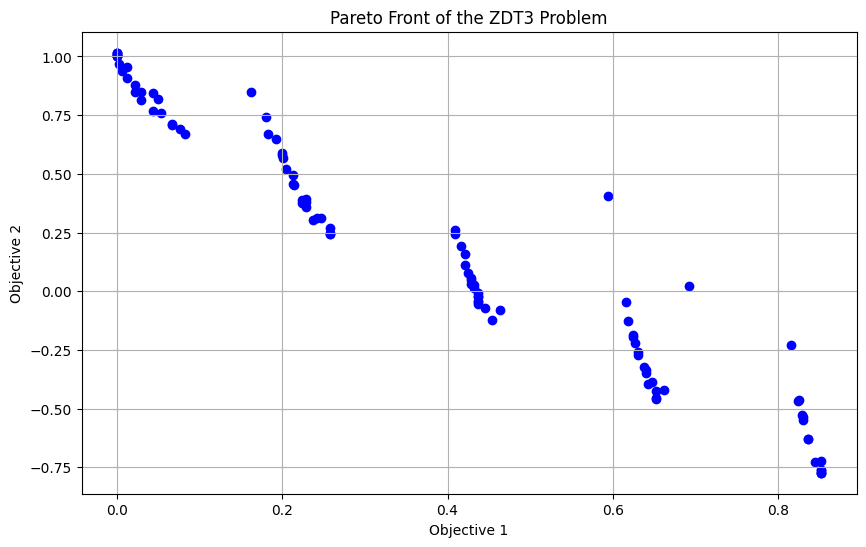

In [141]:
#  NSGA2() and class ZDT3()
optimizer = NSGA2(lower=prob.lower, upper=prob.upper, pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=20)

problem = ZDT3()

# solve the ZDT3 problem
[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=500)

#-----------BEGIN-----------#
# TODO: Plot the final population `optimum_fx` in the objective space

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1], c='blue')
plt.title("Pareto Front of the ZDT3 Problem")
plt.xlabel("Objective 1")
plt.ylabel("Objective 2")
plt.grid(True)
plt.show()
#-----------END-----------#

### TODO: Use NSGA-II to Solve a Real-World Problem: Crashworthiness Design of Vehicles (10 marks)

The automotive industry places great importance on structural optimization for crashworthiness. In a study by Liao et al. [2], the crashworthiness design of vehicles was modeled as a multi-objective optimization problem. The problem aims to minimize three objectives: weight ($f_1$), acceleration characteristics ($f_2$), and toe-board intrusion ($f_3$) of the vehicle design. The decision variables for the problem specify the thickness of five reinforced members around the frontal structure of the vehicle, respectively. You are required to use NSGA-II to optimize the following crashworthiness design problem.

- Number of objectives: 3
- Number of decision variables: 5

$$
\begin{aligned}
&\mathrm{minimize} \left\{\begin{aligned}
f_1(\mathbf{x})= \,& 1640.2823+2.3573285 x_1+2.3220035 x_2 \\
& +4.5688768 x_3+7.7213633 x_4 +4.4559504 x_5\\
f_2(\mathbf{x})= \,& 6.5856+1.15 x_1-1.0427 x_2+0.9738 x_3 \\
& +0.8364 x_4-0.3695 x_1 x_4+0.0861 x_1 x_5 \\
& +0.3628 x_2 x_4-0.1106 x_1^2-0.3437 x_3^2 \\
& +0.1764 x_4^2\\
f_3(\mathbf{x})= & -0.0551+0.0181 x_1+0.1024 x_2 \\
& +0.0421 x_3-0.0073 x_1 x_2+0.024 x_2 x_3 \\
& -0.0118 x_2 x_4-0.0204 x_3 x_4-0.008 x_3 x_5 \\
& -0.0241 x_2^2+0.0109 x_4^2\\
\end{aligned}\right., \\
& \mathrm{where} \enspace  1 \leq x_i \leq 3, \enspace i=1,\ldots,5.
\end{aligned}
$$


[2] Liao, X., Li, Q., Yang, X., Zhang, W., & Li, W. (2008). Multiobjective optimization for crash safety design of vehicles using stepwise regression model. Structural and multidisciplinary optimization, 35, 561-569.

Your task is to **instantiate the NSGA2() and CrashworthinessDesign() classes, use NSGA-II to solve the problem, obtain the final population, and visualize the final population**.

You can refer to the example figures below for reference. The left figure displays the Pareto front approximated by combining solutions obtained by several state-of-the-art algorithms, and the right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_crash.png?raw=true" alt="PF of crash" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_crash.png?raw=true" alt="NSGA2 on crash" style="width: 40%;">
</div>

Note that while NSGA-II provides solutions that are in close proximity to the Pareto front, indicating good convergence, these solutions are not evenly distributed across the Pareto front. **What are the reasons behind the poor distribution of solutions obtained by NSGA-II? Do you have any suggestions for improving NSGA-II performance on this problem? Please share your thoughts and suggestions.**


In [142]:
class CrashworthinessDesign():

    def __init__(self):
        self.name = 'Crashworthiness design of vehicles'
        self.n_obj = 3
        self.n_var = 5

        self.lower = np.full(self.n_var, 1.0)
        self.upper = np.full(self.n_var, 3.0)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))

        x1 = x[:, 0]
        x2 = x[:, 1]
        x3 = x[:, 2]
        x4 = x[:, 3]
        x5 = x[:, 4]

        f[:, 0] = 1640.2823 + (2.3573285 * x1) + (2.3220035 * x2) + (
            4.5688768 * x3) + (7.7213633 * x4) + (4.4559504 * x5)
        f[:, 1] = 6.5856 + (1.15 * x1) - (1.0427 * x2) + (0.9738 * x3) + (
            0.8364 * x4) - (0.3695 * x1 * x4) + (0.0861 * x1 * x5) + (
                0.3628 * x2 * x4) - (0.1106 * x1 * x1) - (0.3437 * x3 * x3) + (
                    0.1764 * x4 * x4)
        f[:, 2] = -0.0551 + (0.0181 * x1) + (0.1024 * x2) + (0.0421 * x3) - (
            0.0073 * x1 * x2) + (0.024 * x2 * x3) - (0.0118 * x2 * x4) - (
                0.0204 * x3 * x4) - (0.008 * x3 * x5) - (0.0241 * x2 * x2) + (
                    0.0109 * x4 * x4)

        return f

In [143]:
# Create an instance of the crashworthiness design problem
prob = CrashworthinessDesign()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = Crashworthiness design of vehicles
Number of objectives = 3
Number of variables = 5
Lower bounds = [1. 1. 1. 1. 1.]
Upper bounds = [3. 3. 3. 3. 3.]


In [144]:
# Initialize a population with 5 solutions and evaluate them
pop_size = 5
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f = prob.evaluate(x)
print(f"f(x) = {f}")

x =  [[1.07256498 2.55647367 2.28511899 2.65561867 2.1836087 ]
 [1.69080065 1.10926055 2.10762033 2.30611699 2.34129009]
 [1.83738134 1.8845766  1.53243091 1.8563923  2.44185032]
 [2.97871293 2.15135758 2.71854367 1.52280606 1.04197979]
 [2.95401364 1.31889323 2.4914239  1.59468506 1.45161997]]
f(x) = [[1.68942230e+03 1.05341470e+01 1.18026591e-01]
 [1.68471228e+03 1.02780014e+01 7.97404603e-02]
 [1.68120574e+03 9.60113837e+00 1.02403851e-01]
 [1.68112140e+03 8.35627102e+00 1.95111319e-01]
 [1.68047285e+03 9.10915038e+00 1.39729114e-01]]


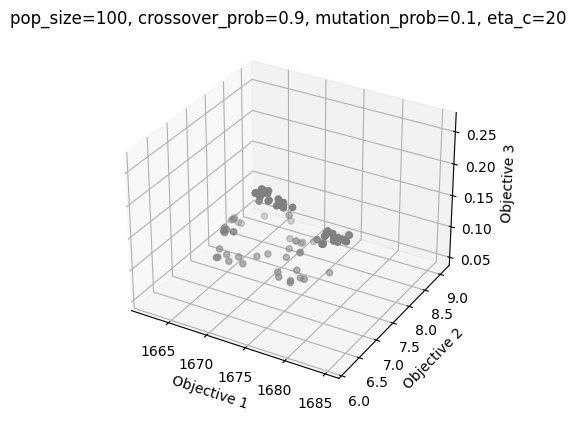

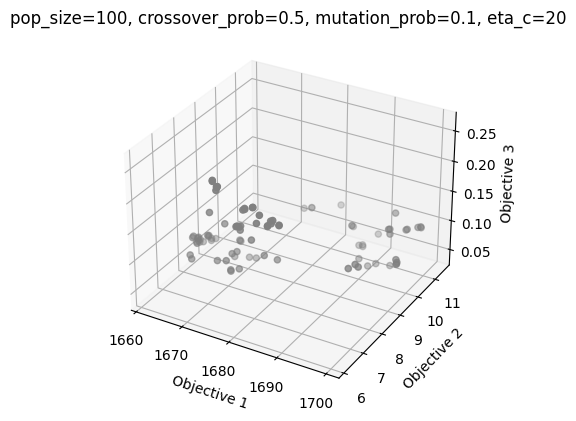

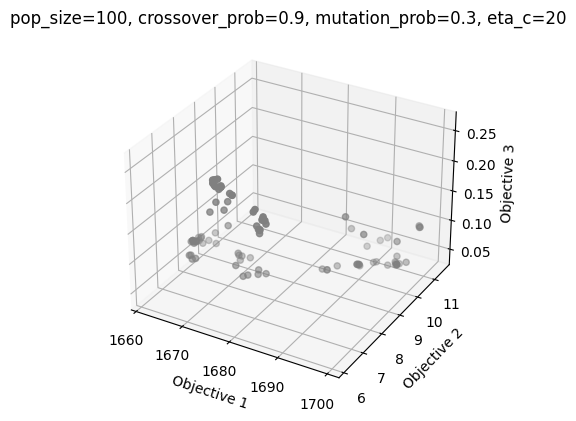

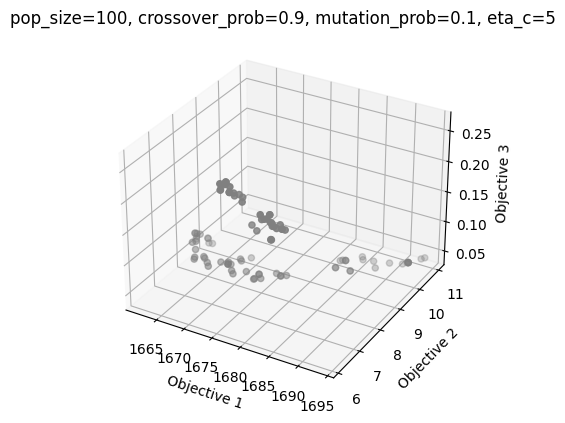

In [145]:
#-----------BEGIN-----------#
# TODO:
#   1. Instantiate class NSGA2() and class CrashworthinessDesign()
#   2. Use NSGA-II to solve the crashworthiness design problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Share your thoughts on the questions above.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Instantiate optimizer and problem classes
optimizer = NSGA2(lower=np.full(5, 1.0), upper=np.full(5, 3.0), pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=20)
problem = CrashworthinessDesign()

# Solve the problem
optimum_x, optimum_fx = optimizer.run(problem, max_gen=500)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], optimum_fx[:, 2], c='gray')
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
plt.title('pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=20')
plt.show()



# Instantiate optimizer and problem classes
optimizer = NSGA2(lower=np.full(5, 1.0), upper=np.full(5, 3.0), pop_size=100, crossover_prob=0.5, mutation_prob=0.1, eta_c=20)
problem = CrashworthinessDesign()

# Solve the problem
optimum_x, optimum_fx = optimizer.run(problem, max_gen=500)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], optimum_fx[:, 2], c='gray')
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
plt.title('pop_size=100, crossover_prob=0.5, mutation_prob=0.1, eta_c=20')
plt.show()



# Instantiate optimizer and problem classes
optimizer = NSGA2(lower=np.full(5, 1.0), upper=np.full(5, 3.0), pop_size=100, crossover_prob=0.9, mutation_prob=0.3, eta_c=20)
problem = CrashworthinessDesign()

# Solve the problem
optimum_x, optimum_fx = optimizer.run(problem, max_gen=500)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], optimum_fx[:, 2], c='gray')
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
plt.title('pop_size=100, crossover_prob=0.9, mutation_prob=0.3, eta_c=20')
plt.show()



# Instantiate optimizer and problem classes
optimizer = NSGA2(lower=np.full(5, 1.0), upper=np.full(5, 3.0), pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=5)
problem = CrashworthinessDesign()

# Solve the problem
optimum_x, optimum_fx = optimizer.run(problem, max_gen=500)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], optimum_fx[:, 2], c='gray')
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
plt.title('pop_size=100, crossover_prob=0.9, mutation_prob=0.1, eta_c=5')
plt.show()

# Discuss the results and any potential improvements or observations.

# The reasons behind the uneven distribution of solutions obtained by NSGA-II include:
# Selection Pressure: Excessive selection pressure during tournament selection may favor solutions in local regions, overlooking other potential solutions.
# Genetic Operation Bias: Insufficient randomness in crossover and mutation operations or improperly set parameters may cause newly generated solutions to cluster in specific areas.
# Crowding Distance Calculation: Incorrect computation or utilization of crowding distance in the selection process may result in an uneven distribution of solutions.

# To enhance NSGA-II's performance on this issue, the following strategies can be considered:
# Adjust Tournament Selection Strategy: Reduce selection pressure to allow for more genetic diversity.
# Fine-tune Genetic Operation Parameters: Adjust crossover and mutation parameters to increase randomness and diversity in the search space.
# Improve Crowding Distance Computation: Ensure crowding distance effectively guides population development, promoting an even distribution along the Pareto front.
# Implement Diversity Preservation Mechanisms: Introduce additional mechanisms such as fitness sharing or restriction operations to prevent solutions from overly clustering.
# Parameter Tuning and Adaptation: Dynamically adjust algorithm parameters, such as adapting crossover and mutation probabilities during runtime or modifying tournament sizes adaptively based on the current population distribution.


#-----------END-----------#

## Part 2. Constrained Multi-Objective Optimization

In this part, your task is to implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve constrained optimization problems.

### Introduction to a Constrained Optimization Problem: MW7

The MW test suite [3] is a constrained multi-objective optimization test suite proposed by Zhongwei Ma and Yong Wang. It is designed to evaluate the performance of constrained multi-objective optimization algorithms. MW7 is one of the test problems in the MW test suite. We have implemented the MW7() class and provided examples on how to use it below.

- Number of objectives: 2
- Number of decision variables: 15
- Number of constraints: 2

$$
\begin{aligned}
&\mathrm{minimize} \left\{
\begin{array}{l}
f_1(\mathbf{x})=g_3(\mathbf{x}) x_1 \\
f_2(\mathbf{x})=g_3(\mathbf{x}) \sqrt{1-\left(f_1(\mathbf{x}) / g_3(\mathbf{x})\right)^2}
\end{array}\:,\right. \\
&\mathrm{subject~to} \enspace c_1(\mathbf{x})=\left(1.2+0.4 \sin (4 l)^{16}\right)^2-(f_1(\mathbf{x}))^2-(f_2(\mathbf{x}))^2 \geq 0,\\
& \qquad \qquad c_2(\mathbf{x})=(f_1(\mathbf{x}))^2 + (f_2(\mathbf{x}))^2 - \left(1.15 - 0.2 \sin (4 l)^8\right)^2 \geq 0,\\
&\mathrm{where} \enspace g_3(\mathbf{x})=1+\sum_{i=m}^n 2\left(x_i+\left(x_{i-1}-0.5\right)^2-1\right)^2, \\
& \qquad \enspace l=\arctan \left(f_2(\mathbf{x}) / f_1(\mathbf{x})\right),\\
& \qquad \enspace 0 \leq x_i \leq 1, \enspace i=1,\ldots,n,.
\end{aligned}
$$


[3] Ma, Z., & Wang, Y. (2019). Evolutionary constrained multiobjective optimization: Test suite construction and performance comparisons. IEEE Transactions on Evolutionary Computation, 23(6), 972-986.

In [146]:
class MW7():

    def __init__(self):
        self.name = 'MW7'
        self.n_obj = 2  # number of objectives
        self.n_var = 15  # number of decision variables
        self.n_con = 2  # number of constraints

        self.lower = np.zeros(self.n_var)
        self.upper = np.ones(self.n_var)

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        g3 = 1 + 2.0 * np.sum((x[:, self.n_obj - 1:] +
                               (x[:, self.n_obj - 2:-1] - 0.5)**2 - 1.0)**2,
                              axis=1)

        f[:, 0] = g3 * x[:, 0]
        f[:, 1] = g3 * (1 - (f[:, 0] / g3)**2)**0.5

        with np.errstate(divide='ignore'):
            l = np.arctan(f[:, 1] / f[:, 0])

        c[:, 0] = (1.2 + 0.4 * (np.sin(4 * l))**16)**2 - f[:, 0]**2 - f[:, 1]**2
        c[:, 1] = f[:, 0]**2 + f[:, 1]**2 - (1.15 - 0.2 * (np.sin(4 * l))**8)**2
        c = np.where(c < 0, -c, 0)  # the degree of constraint violation of x at each constraint

        return f, c

In [147]:
# Create an instance of MW7
prob = MW7()
print(f"Problem = {prob.name}")
print(f"Number of objectives = {prob.n_obj}")
print(f"Number of variables = {prob.n_var}")
print(f"Number of constraints = {prob.n_con}")
print(f"Lower bounds = {prob.lower}")
print(f"Upper bounds = {prob.upper}")

Problem = MW7
Number of objectives = 2
Number of variables = 15
Number of constraints = 2
Lower bounds = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Upper bounds = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [148]:
# Initialize a population with 1 solution and evaluate it
pop_size = 1
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")  # Constraint Violation

x =  [[0.31611658 0.57275476 0.71496523 0.41137571 0.33743081 0.14593395
  0.84646658 0.11671881 0.02094174 0.16635539 0.13850013 0.11591111
  0.93243245 0.29960398 0.84628279]]
f(x) = [[3.28442523 9.85712648]]
c(x) = [[105.9687558   0.       ]]
CV(x) = [[105.9687558]]


In [149]:
# Initialize a population with 2 solution and evaluate them
pop_size = 2
x = prob.lower + (prob.upper - prob.lower) * np.random.rand(
    pop_size, prob.n_var)
print("x = ", x)

f, c = prob.evaluate(x)
print(f"f(x) = {f}")
print(f"c(x) = {c}")
print(f"CV(x) = {np.sum(c, axis=1, keepdims=True)}")

x =  [[0.3164936  0.3880325  0.42867693 0.87895552 0.23816127 0.30561814
  0.25597796 0.07083284 0.70393957 0.63351215 0.47226529 0.09128328
  0.89882988 0.84364089 0.48555914]
 [0.75620465 0.20941969 0.08123346 0.83445719 0.84846529 0.66374194
  0.66553899 0.76545184 0.15038705 0.14722582 0.0359845  0.29597419
  0.90772468 0.52817683 0.70341077]]
f(x) = [[2.88191367 8.63767194]
 [6.31422723 5.46362815]]
c(x) = [[80.92881569  0.        ]
 [68.28069808  0.        ]]
CV(x) = [[80.92881569]
 [68.28069808]]


### TODO: Implement Constrained NSGA-II and Solve MW7 (30 marks)
Your task is to **implement the parameter-less constraint handling technique in NSGA-II and use the constrained NSGA-II to solve the MW7 problem**.

You can refer to the example figures below for reference. The left figure (from [3]) displays the true Pareto front (represented by red points), the unconstrained Pareto front (represented by the blue line), and the feasible region (represented by the gray region). The right figure displays the final population obtained by NSGA-II. Your expected solutions should be similar to the gray circles in the right figure.

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/PF_MW7.png?raw=true" alt="PF of MW7" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7.png?raw=true" alt="NSGA2 on MW7" style="width: 40%;">
</div>

Note that sometimes the solutions obtained by NSGA-II may not cover all segments of the Pareto front (as shown below). **What are the possible reasons? Please share your thoughts in your report.**

<div style="display: flex;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_2.png?raw=true" alt="NSGA2 on MW7 2" style="width: 40%;">
    <img src="https://github.com/linjunhe/CEG5302-Projects/blob/main/NSGA2_MW7_3.png?raw=true" alt="NSGA2 on MW7 3" style="width: 40%;">
</div>

In [153]:

class CNSGA2():
    def __init__(self, pop_size=100, crossover_prob=0.8, mutation_prob=0.1, eta_crossover=20, eta_mutation=20):
        self.pop_size = pop_size
        self.crossover_prob = crossover_prob
        self.mutation_prob = mutation_prob
        self.eta_crossover = eta_crossover
        self.eta_mutation = eta_mutation
        self.problem = None
        self.rank = None
        self.fronts = None
        self.crowding_distance = None
        self.population = None
        self.population_fx = None
        self.population_cv = None
        self.mating_pool = None

    def initialize(self, prob):
        x = prob.lower + (prob.upper - prob.lower) * np.random.rand(self.pop_size, prob.n_var)
        return x

    def tournament_selection(self, population, rank, distance):
        mating_pool = []
        for _ in range(self.pop_size):
            p = np.random.randint(self.pop_size, size=2)
            if rank[p[0]] < rank[p[1]] or (rank[p[0]] == rank[p[1]] and self.crowding_distance[p[0]] > self.crowding_distance[p[1]]):
                mating_pool.append(population[p[0]])
            else:
                mating_pool.append(population[p[1]])

        return mating_pool

    def non_dominated_sort(self, population, population_fx, population_cv):
        num_individuals = len(population)
        rank = np.zeros(num_individuals, dtype=int)

        # Lists to hold the sets of dominated and dominating individuals
        dominated_by = [set() for _ in range(num_individuals)]
        dominate = [set() for _ in range(num_individuals)]

        # Efficiently compute domination relations
        for i in range(num_individuals):
            for j in range(i + 1, num_individuals):
                # Inlining domination logic here
                if (population_cv[i] == 0 and population_cv[j] == 0) or (population_cv[i] != 0 and population_cv[j] != 0):
                    dom_i_j = (population_fx[i] <= population_fx[j]).all() and not (population_fx[i] == population_fx[j]).all()
                    dom_j_i = (population_fx[j] <= population_fx[i]).all() and not (population_fx[j] == population_fx[i]).all()
                else:
                    dom_i_j = population_cv[i] < population_cv[j]
                    dom_j_i = population_cv[j] < population_cv[i]

                if dom_i_j:
                    dominate[i].add(j)
                    dominated_by[j].add(i)
                if dom_j_i:
                    dominate[j].add(i)
                    dominated_by[i].add(j)

        # Initialize fronts
        fronts = [[]]
        for i in range(num_individuals):
            if not dominated_by[i]:
                fronts[0].append(i)
                rank[i] = 0

        # Build subsequent fronts
        current_front = 0
        while current_front < len(fronts) and fronts[current_front]:
            next_front = []
            for i in fronts[current_front]:
                for j in dominate[i]:
                    dominated_by[j].remove(i)
                    if not dominated_by[j]:
                        next_front.append(j)
                        rank[j] = current_front + 1
            if next_front:
                fronts.append(next_front)
            current_front += 1

        self.rank = rank
        self.fronts = fronts

    def crowding_distance_calculation(self, population, population_fx, fronts):
        num_individuals = len(population)
        distance = np.zeros(num_individuals)

        for front in fronts:
            if len(front) > 2:  # If the front has only one or two individuals, their crowding distance is already set to infinity
                for i in range(population_fx.shape[1]):  # Iterate through each objective function
                    # Get current objective function values
                    fx_values = population_fx[front, i]
                    # Get the sorted indices
                    sorted_idx = np.argsort(fx_values)

                    # Get the individuals sorted according to the objective function
                    sorted_front = np.array(front)[sorted_idx]

                    # Initialize the distance as infinity
                    distance[sorted_front[0]] = np.inf
                    distance[sorted_front[-1]] = np.inf

                    # Calculate crowding distance for intermediate individuals
                    fx_sorted = fx_values[sorted_idx]
                    delta_fx = fx_sorted[2:] - fx_sorted[:-2]  # Differences between adjacent values, calculated vectorized

                    # Update the crowding distance
                    distance[sorted_front[1:-1]] += delta_fx

        # Ensure that the values marked as infinity are not affected by accumulation
        distance[distance == np.inf] = np.max(distance[np.isfinite(distance)]) * 2 if np.isfinite(distance).any() else np.inf

        self.crowding_distance = distance

    def crossover(self, mating_pool):
        offspring = []
        np.random.shuffle(mating_pool)  # Shuffle the mating pool in place for random pairing
        for i in range(0, self.pop_size, 2):  # Step through pairs of individuals
            if i + 1 >= len(mating_pool):
                continue  # Skip if there's no pair available (odd number case)

            parent1 = mating_pool[i]
            parent2 = mating_pool[i + 1]

            if np.random.rand() < self.crossover_prob:
                # Uniform random array for crossover decision
                u = np.random.rand(self.problem.n_var)
                # Beta calculation for SBX (Simulated Binary Crossover)
                beta = np.empty(self.problem.n_var)
                beta[u <= 0.5] = np.power(2 * u[u <= 0.5], 1 / (self.eta_crossover + 1))
                beta[u > 0.5] = np.power(0.5 / (1 - u[u > 0.5]), 1 / (self.eta_crossover + 1))

                # Generate two children
                child1 = 0.5 * ((1 + beta) * parent1 + (1 - beta) * parent2)
                child2 = 0.5 * ((1 - beta) * parent1 + (1 + beta) * parent2)

                # Ensure children are within bounds
                child1 = np.clip(child1, self.problem.lower, self.problem.upper)
                child2 = np.clip(child2, self.problem.lower, self.problem.upper)

                offspring.extend([child1, child2])
            else:
                # If no crossover, carry parents to the next generation unchanged
                offspring.extend([parent1, parent2])

        return np.array(offspring)


    def mutation(self, offspring_x):
        # Shape and random masks for where mutation will occur
        mutate = np.random.rand(*offspring_x.shape) < self.mutation_prob
        if not np.any(mutate):
            return offspring_x  # Early exit if no mutations are to occur

        # Define mutations only where required
        row_indices, col_indices = np.where(mutate)

        # Gather values only where mutations are to occur
        offspring_x_mut = offspring_x[row_indices, col_indices]
        lower_bounds = self.problem.lower[col_indices]
        upper_bounds = self.problem.upper[col_indices]

        # Calculate deltas relative to bounds
        delta1 = (offspring_x_mut - lower_bounds) / (upper_bounds - lower_bounds)
        delta2 = (upper_bounds - offspring_x_mut) / (upper_bounds - lower_bounds)

        # Uniform random values for mutation decisions
        rand = np.random.rand(offspring_x_mut.size)

        # Compute mutation polynomial mutation distribution
        mask = rand <= 0.5
        deltaq = np.where(mask,np.power(2. * rand + (1. - 2. * rand) * np.power(1. - delta1, self.eta_mutation + 1.), 1. / (self.eta_mutation + 1.)) - 1.,
                          1. - np.power(2. * (1. - rand) + 2. * (rand - 0.5) * np.power(1. - delta2, self.eta_mutation + 1.), 1. / (self.eta_mutation + 1.)))

        # Apply mutation changes
        offspring_x_mut += deltaq * (upper_bounds - lower_bounds)

        # Ensure mutations are within bounds
        np.clip(offspring_x_mut, lower_bounds, upper_bounds, out=offspring_x_mut)

        # Place mutated genes back into the original array
        offspring_x[row_indices, col_indices] = offspring_x_mut

        return offspring_x


    def environmental_selection(self, population, population_fx, population_cv):
        # Non-dominated sorting to determine front ranks and which fronts individuals belong to
        self.non_dominated_sort(population, population_fx, population_cv)

        # Calculation of crowding distances for each individual in the population
        self.crowding_distance_calculation(population, population_fx, self.fronts)

        # Prepare lists for new population based on the sorting and crowding distance
        sorted_indices = sorted(range(len(population)),key=lambda x: (self.rank[x], -self.crowding_distance[x]))

        # Select the next generation based on rank and crowding distance
        next_population_indices = sorted_indices[:self.pop_size]
        next_population = population[next_population_indices]
        next_population_fx = population_fx[next_population_indices]
        next_population_cv = population_cv[next_population_indices]
        next_rank = self.rank[next_population_indices]
        next_distance = self.crowding_distance[next_population_indices]

        self.population=next_population
        self.population_fx=next_population_fx
        self.population_cv=next_population_cv
        self.rank=next_rank
        self.crowding_distance=next_distance

    def run(self, prob, max_gen=500):
        # Initialization
        self.problem=prob
        self.population = self.initialize(prob)
        self.population_fx, population_cx = prob.evaluate(self.population)

        # Normalize constraint violations initially
        max_cv = np.max(population_cx, axis=0, keepdims=True)
        self.population_cv = np.sum(population_cx / max_cv, axis=1, keepdims=True) if max_cv.all() else np.sum(population_cx, axis=1, keepdims=True)

        # Non-dominated sorting to initialize rankings and crowding distances
        self.non_dominated_sort(self.population, self.population_fx, self.population_cv)
        self.crowding_distance_calculation(self.population, self.population_fx, self.fronts)

        for i in range(1, max_gen):
            # Tournament selection for mating
            self.mating_pool = self.tournament_selection(self.population, self.rank, self.crowding_distance)

            # Generate offspring through crossover and mutation
            offspring_x = self.crossover(self.mating_pool)
            offspring_x = self.mutation(offspring_x)

            # Evaluate the new offspring
            offspring_fx, offspring_cx = prob.evaluate(offspring_x)

            # Normalize constraint violations for offspring
            offspring_cv = np.sum(offspring_cx / max_cv, axis=1, keepdims=True) if max_cv.all() else np.sum(offspring_cx, axis=1, keepdims=True)

            # Combine current population and offspring into a single array for selection
            combine_population = np.concatenate((self.population, offspring_x), axis=0)
            combine_population_fx = np.concatenate((self.population_fx, offspring_fx), axis=0)
            combine_population_cv = np.concatenate((self.population_cv, offspring_cv), axis=0)

            # Environmental selection to form the next generation

            self.environmental_selection(combine_population, combine_population_fx, combine_population_cv)

            #print(f"Generation: {i}")

        return self.population, self.population_fx


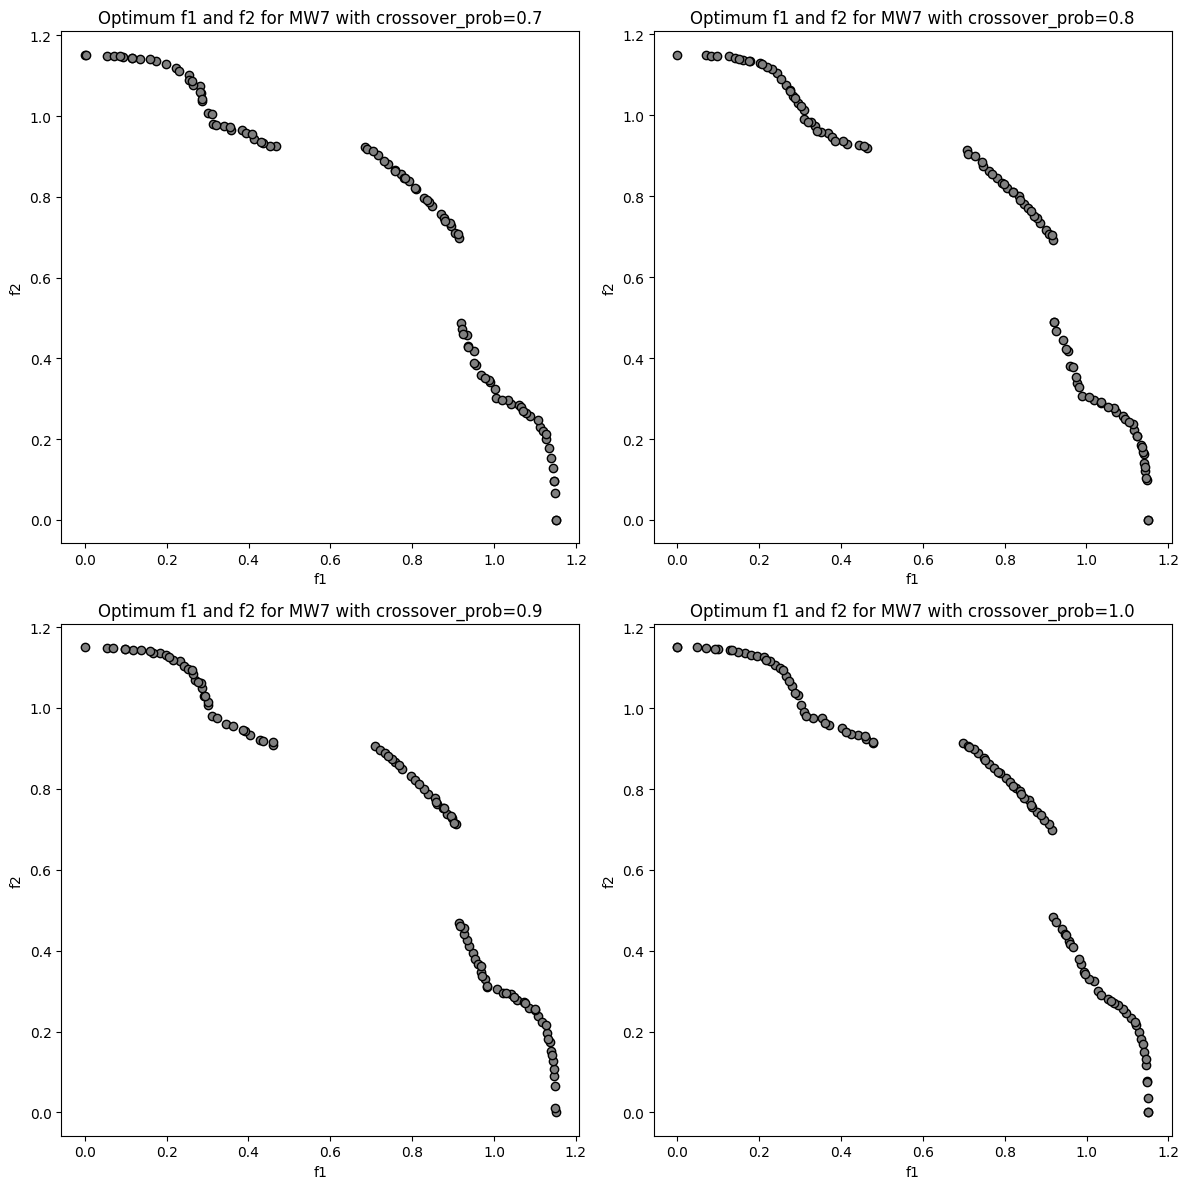

In [154]:
# compare crossover_probability=[0.7, 0.8, 0.9, 1.0]
import matplotlib.pyplot as plt

# Define different crossover probabilities
crossover_probs = [0.7, 0.8, 0.9, 1.0]

# Create a canvas with a subplot for each crossover probability
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array from 2D to 1D

for idx, cp in enumerate(crossover_probs):
    # Initialize the optimizer with a different crossover probability each time
    optimizer = CNSGA2(pop_size=100, crossover_prob=cp, mutation_prob=0.1, eta_crossover=5, eta_mutation=5)
    problem = MW7()  # Assuming MW7 is a predefined problem instance

    # Run the optimizer
    [optimum_x, optimum_fx] = optimizer.run(problem, max_gen=100)

    # Plot the results
    ax = axes[idx]
    ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], facecolors='gray', edgecolors='black')
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_title(f"Optimum f1 and f2 for MW7 with crossover_prob={cp}")

plt.tight_layout()
plt.show()


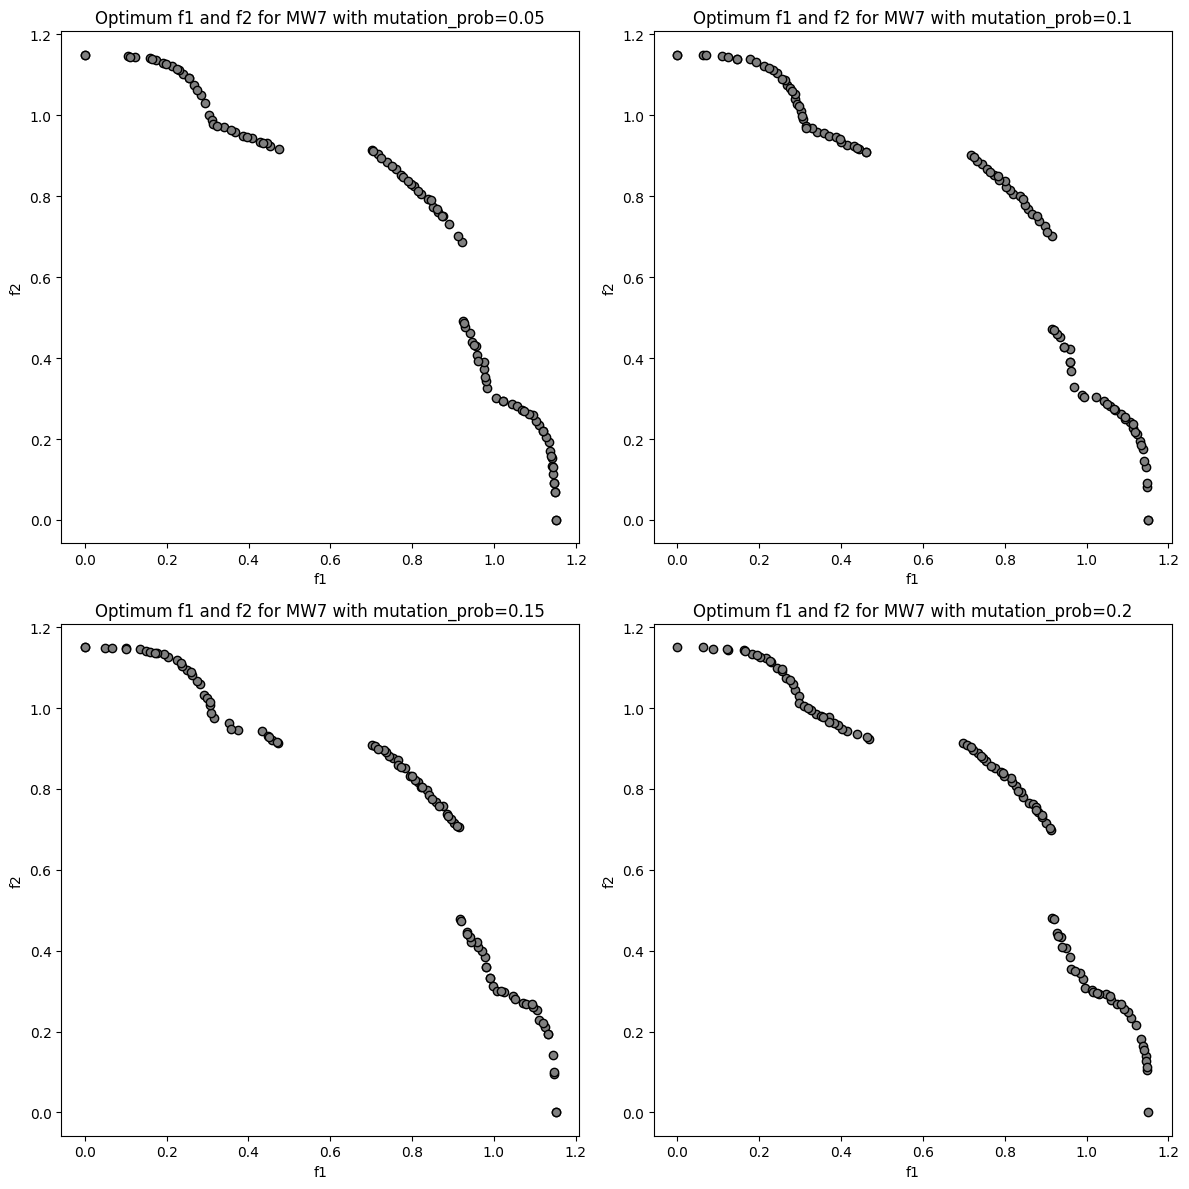

In [156]:
# compare mutation_probability=[0.05,0.1,0.15,0.2]
import matplotlib.pyplot as plt

# Define different mutation probabilities
mutation_probs = [0.05, 0.1, 0.15, 0.2]

# Create a canvas with a subplot for each mutation probability
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array from 2D to 1D

for idx, mp in enumerate(mutation_probs):
    # Initialize the optimizer with a different mutation probability each time
    optimizer = CNSGA2(pop_size=100, crossover_prob=0.8, mutation_prob=mp, eta_crossover=5, eta_mutation=5)
    problem = MW7()  # Assuming MW7 is a predefined problem instance

    # Run the optimizer
    [optimum_x, optimum_fx] = optimizer.run(problem, max_gen=100)

    # Plot the results
    ax = axes[idx]
    ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], facecolors='gray', edgecolors='black')
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_title(f"Optimum f1 and f2 for MW7 with mutation_prob={mp}")

plt.tight_layout()
plt.show()


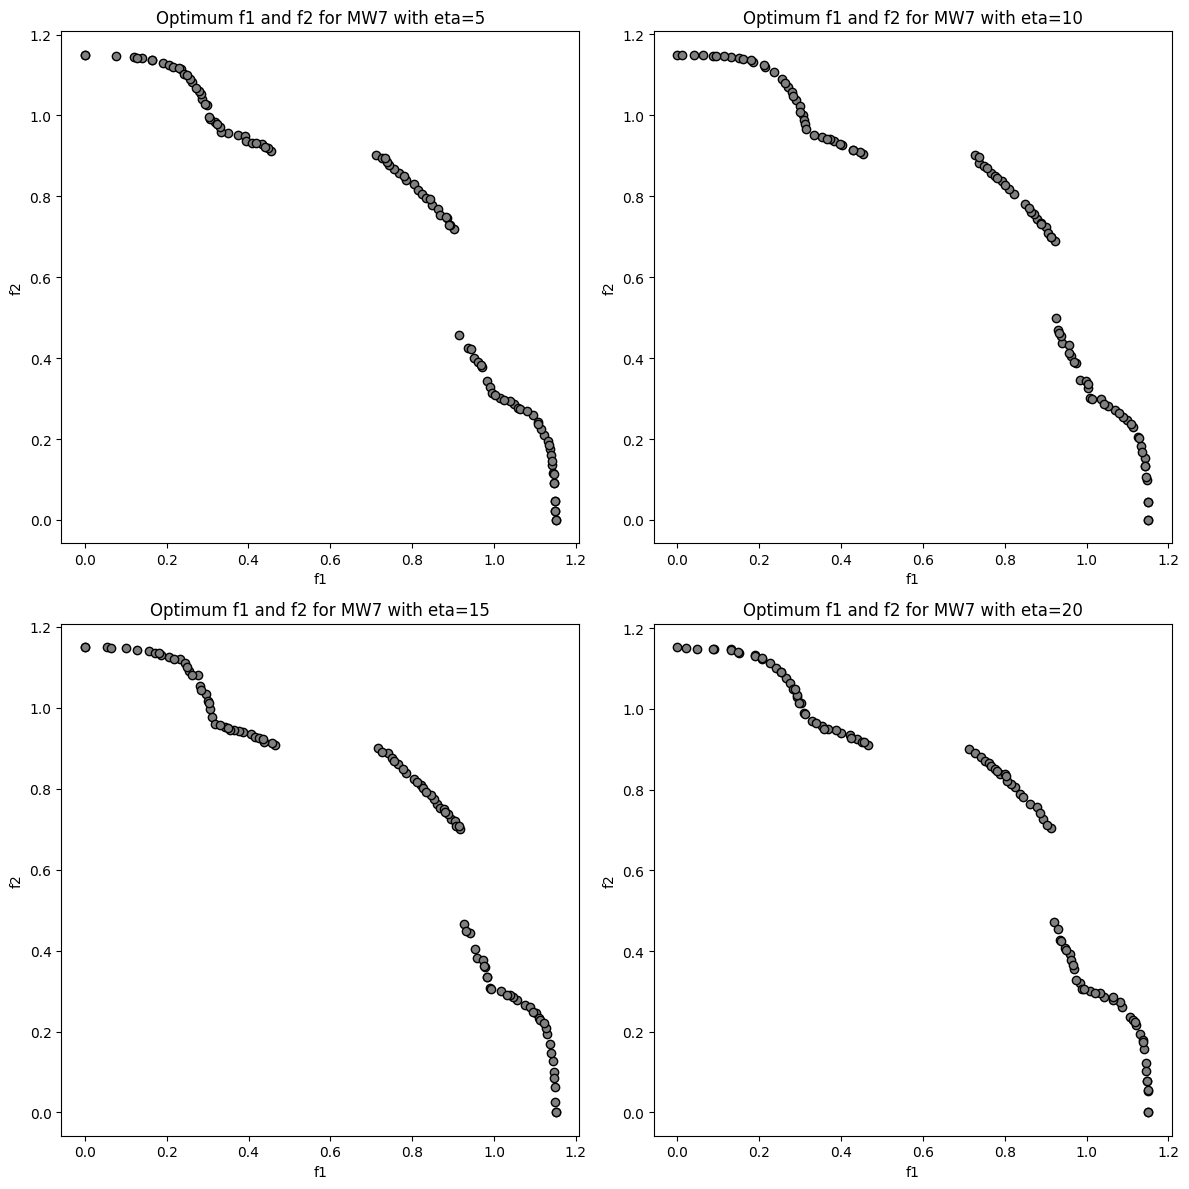

In [157]:
import matplotlib.pyplot as plt

# Define different values for eta_crossover and eta_mutation
etas = [5, 10, 15, 20]

# Create a canvas with a subplot for each parameter setting
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()  # Flatten the axes array from 2D to 1D

for idx, eta in enumerate(etas):
    # Initialize the optimizer with different eta_crossover and eta_mutation values each time
    optimizer = CNSGA2(pop_size=100, crossover_prob=0.8, mutation_prob=0.1, eta_crossover=eta, eta_mutation=eta)
    problem = MW7()  # Assuming MW7 is a predefined problem instance

    # Run the optimizer
    [optimum_x, optimum_fx] = optimizer.run(problem, max_gen=100)

    # Plot the results
    ax = axes[idx]
    ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], facecolors='gray', edgecolors='black')
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_title(f"Optimum f1 and f2 for MW7 with eta={eta}")

plt.tight_layout()
plt.show()


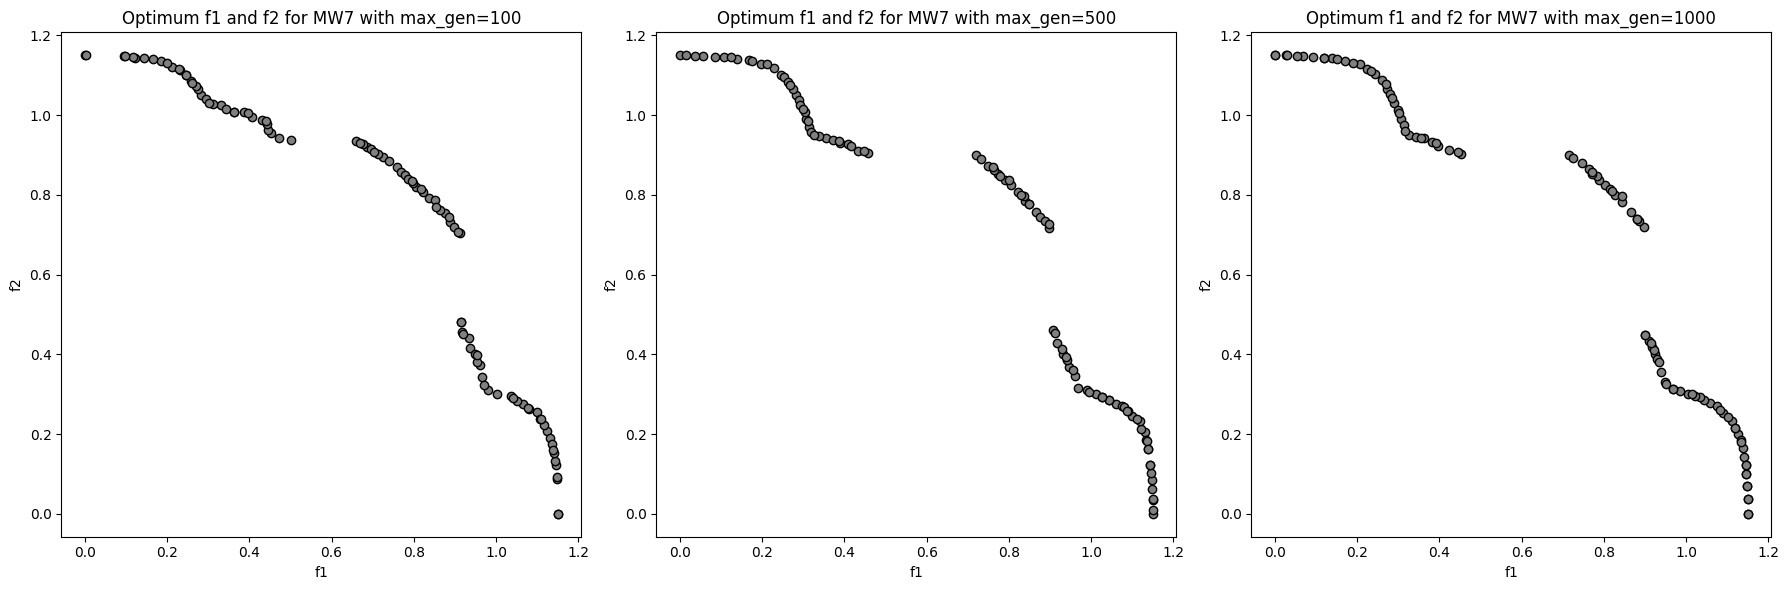

In [158]:
import matplotlib.pyplot as plt

# Define different values for maximum generations
max_gens = [100, 500, 1000]

# Create a canvas with a subplot for each maximum generation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, max_gen in enumerate(max_gens):
    # Initialize the optimizer
    optimizer = CNSGA2(pop_size=100, crossover_prob=0.8, mutation_prob=0.1, eta_crossover=5, eta_mutation=5)
    problem = MW7()  # Assuming MW7 is a predefined problem instance

    # Run the optimizer
    [optimum_x, optimum_fx] = optimizer.run(problem, max_gen=max_gen)

    # Plot the results
    ax = axes[idx]
    ax.scatter(optimum_fx[:, 0], optimum_fx[:, 1], facecolors='gray', edgecolors='black')
    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_title(f"Optimum f1 and f2 for MW7 with max_gen={max_gen}")

plt.tight_layout()
plt.show()


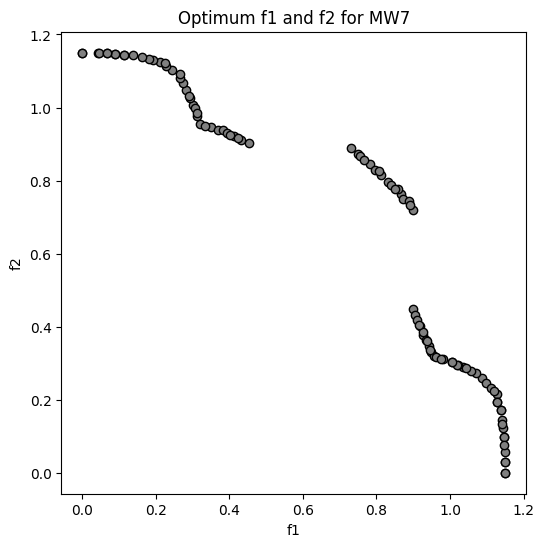

In [159]:
optimizer = CNSGA2(pop_size=100, crossover_prob=0.8, mutation_prob=0.1, eta_crossover=5, eta_mutation=5)
problem = MW7()

[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=1000)
plt.figure(figsize=(6, 6))
plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1],facecolors='gray', edgecolors='black')
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Optimum f1 and f2 for MW7")
plt.show()

During this process, we encountered situations where NSGA-II might not cover all segments of the Pareto front. At that point, we initially increased the crossover probability from 0.8 to 0.9, which improved the situation somewhat but was still insufficient. Subsequently, we identified the issue with our crowding_distance function. We found that the crowding distance of intermediate solutions was not calculated correctly, despite setting the crowding distance of the solutions on both sides to be infinite. We observed that it failed to accurately identify its neighboring solutions. When the crowding distance is inaccurate, solutions that should be considered diverse may erroneously cluster together, resulting in certain regions of the Pareto front being underestimated or completely missed in the final solution set.

In genral, the situation could be the reasons as following:
1. Crowding Distance Function: When the crowding distance is inaccurate, solutions that should be considered diverse may erroneously cluster together. This clustering effect can result in certain regions of the Pareto front being underestimated or completely missed in the final solution set. Consequently, the obtained Pareto front may fail to fully capture the trade-off relationships between conflicting objectives, leading to suboptimal or biased solutions.
2. Population Diversity: The initial solution set's diversity is crucial. Without a broad range of solutions at the start or maintaining diversity throughout the evolutionary process, there's a risk of not fully exploring the search space. This could lead to suboptimal performance in finding a range of feasible solutions in the MW7 problem, which has 15 decision variables and complex, non-linear constraints.
3. Convergence Issues: For the MW7 problem, premature convergence could result in the algorithm settling on localized regions of the Pareto front, failing to find a truly optimal set of solutions. This is a concern given the problem's two objectives and the potential complexity of their interactions, which could be masked by a lack of genetic diversity or disproportionate selection pressures.
4. Algorithm Parameters: In the MW7 test problem, the selection of parameters for crossover and mutation rates is critical as they influence the algorithm's ability to search and exploit the solution space effectively. Inappropriate parameter settings might prevent the algorithm from exploring the full extent of the feasible region defined by the two constraints.
5. Number of Generations: Considering the complexity of the MW7 problem with its 15 variables and two constraints, a greater number of generations may be needed to explore the entirety of the Pareto front adequately. A higher number of iterations allows for a more thorough search and better adaptation to the multi-objective landscape of the problem.



### TODO: Use Constrained NSGA-II to Solve the Assigned Constrained Multi-objective Optimization Problem (30 marks)

You will be assigned one constrained multi-objective problem (refer to the Google Sheet link in the Project announcement) that you are required to solve using the constrained NSGA-II algorithm.

Your task is to **implement the problem class** and **apply the constrained NSGA-II algorithm** to solve the given problem. Additionally, you need to perform parameter analysis to determine the optimal parameter settings for the algorithm, and discuss how the algorithm's parameters affect its performance.

Finally, you should present your best results and provide some discussion.

Kumar, A., Wu, G., Ali, M. Z., Luo, Q., Mallipeddi, R., Suganthan, P. N., & Das, S. (2021). A benchmark-suite of real-world constrained multi-objective optimization problems and some baseline results. Swarm and Evolutionary Computation, 67, 100961.

In [ ]:
#-----------BEGIN-----------#
# TODO:
#   1. Implement the problem class for each problem
#   2. Instantiate the CNSGA2() class and the problem class for each problem
#   3. Use the constrained NSGA-II algorithm to solve each problem with a range of parameter settings
#   4. Analyze the performance of the algorithm with different parameter settings, including the
#      population size, crossover and mutation probabilities, and maximum number of generations
#   5. Plot the final population `optimum_fx` in the objective space for each problem using the best
#      parameter settings that you found in Step 4.
#-----------END-----------#

In [160]:
class CantileverBeamDesign:

    def __init__(self):
        self.name = 'CantileverBeamDesign'
        self.n_obj = 2  # number of objectives: f1 and f2
        self.n_con = 2  # number of constraints: g1 and g2
        self.n_var = 2  # number of decision variables: x1 and x2

        self.lower = np.array([0.01, 0.20])  # lower bounds of decision variables x1, x2
        self.upper = np.array([0.05, 1.00])  # upper bounds of decision variables x1, x2

        # Constants
        self.P = 1  # Given constant P
        self.E = 307e8  # Given constant E
        self.rho = 7800  # Given constant rho
        self.Sy = 3e5  # Given constant Sy
        self.delta_max = 0.05  # Given constant delta_max

    def evaluate(self, x):
        pop_size = len(x)
        f = np.zeros((pop_size, self.n_obj))
        c = np.zeros((pop_size, self.n_con))

        # Note: Assume x is a 2D array where each row represents a solution
        f[:, 0] = 0.25 * np.pi * x[:, 0] ** 2 * x[:, 1]  # Objective function f1
        f[:, 1] = (64 * self.P * x[:, 1] ** 3) / (3 * self.E * x[:, 0] ** 4)  # Objective function f2

        # Calculate the constraints for each individual in the population
        c[:, 0] = -self.Sy + (32 * self.P * x[:, 1]) / (np.pi * x[:, 0] ** 3)  # Constraint g1
        c[:, 1] = -self.delta_max + (64 * self.P * x[:, 1] ** 3) / (3 * self.E * x[:, 0] ** 4)  # Constraint g2

        # Handle constraint violations
        c = np.where(c < 0, -c, 0)

        return f, c


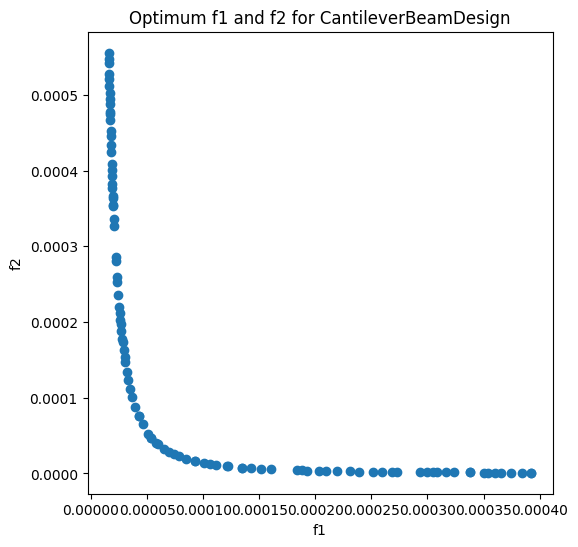

In [161]:
#-----------BEGIN-----------#
# TODO:
#   1. Instantiate class CNSGA2() and class MW7()
#   2. Use NSGA-II with a contraint handling technique to solve the MW7 problem
#   3. Plot the final population `optimum_fx` in the objective space
#   4. Answer the question: What are the possible reasons why the solutions
#      obtained by NSGA-II fail to cover all segments of the Pareto front?
#-----------END-----------#
import matplotlib.pyplot as plt

# Instantiate CantileverBeamDesign and CNSGA2

optimizer = CNSGA2(pop_size=100, crossover_prob=0.8, mutation_prob=0.1, eta_crossover=5, eta_mutation=5)
problem = CantileverBeamDesign()

[optimum_x, optimum_fx] = optimizer.run(problem, max_gen=1000)

plt.figure(figsize=(6, 6))
plt.scatter(optimum_fx[:, 0], optimum_fx[:, 1])
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("Optimum f1 and f2 for CantileverBeamDesign")
plt.show()